In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to C:\Users\RAFIQI
[nltk_data]     RAIHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\RAFIQI
[nltk_data]     RAIHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\RAFIQI
[nltk_data]     RAIHAN\AppData\Roaming\nltk_data...


True

In [ ]:
brand_df = pd.read_csv('data/reviews_clinique.csv')
brand_df.info()

C:\Users\RAFIQI RAIHAN\AppData\Local\Temp\ipykernel_6256\764777434.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  brand_df = pd.read_csv('dataset/reviews_clinique.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49029 entries, 0 to 49028
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49029 non-null  int64  
 1   author_id                 49029 non-null  object 
 2   rating                    49029 non-null  int64  
 3   is_recommended            22724 non-null  float64
 4   helpfulness               19195 non-null  float64
 5   total_feedback_count      49029 non-null  int64  
 6   total_neg_feedback_count  49029 non-null  int64  
 7   total_pos_feedback_count  49029 non-null  int64  
 8   submission_time           49029 non-null  object 
 9   review_text               48977 non-null  object 
 10  review_title              38236 non-null  object 
 11  skin_tone                 31213 non-null  object 
 12  eye_color                 21678 non-null  object 
 13  skin_type                 38060 non-null  object 
 14  hair_c

In [22]:
brand_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,148180,5798933243,5,1.0,NaN,0,0,0,2023-03-20,I love this stuff. I got it as a sample then b...,...,0,0,0,"['Vegan', 'Community Favorite', 'Fragrance Fre...",Skincare,Cleansers,Face Wash & Cleansers,2,51.0,14.0
1,148181,25526458589,5,1.0,NaN,0,0,0,2023-03-10,"I’ve tried a few cleansing balms and, while I ...",...,0,0,0,"['Vegan', 'Community Favorite', 'Fragrance Fre...",Skincare,Cleansers,Face Wash & Cleansers,2,51.0,14.0
2,148182,12958904843,1,0.0,0.75,4,1,3,2023-02-26,Felt like removing make up took too longWould ...,...,0,0,0,"['Vegan', 'Community Favorite', 'Fragrance Fre...",Skincare,Cleansers,Face Wash & Cleansers,2,51.0,14.0
3,148183,1316510353,4,1.0,1.00,2,0,2,2023-02-26,Love this to double cleanse. It’s unscented an...,...,0,0,0,"['Vegan', 'Community Favorite', 'Fragrance Fre...",Skincare,Cleansers,Face Wash & Cleansers,2,51.0,14.0
4,148184,8389515459,5,1.0,NaN,0,0,0,2023-02-26,Best and most gentle remover! Takes off cakey ...,...,0,0,0,"['Vegan', 'Community Favorite', 'Fragrance Fre...",Skincare,Cleansers,Face Wash & Cleansers,2,51.0,14.0


In [23]:
# Mengecek missing value
missing_data = brand_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("Missing Values:")
print(missing_data)

Missing Values:
sale_price_usd       49029
variation_desc       49029
value_price_usd      48548
helpfulness          29834
hair_color           28470
eye_color            27351
is_recommended       26305
child_max_price      21795
child_min_price      21795
skin_tone            17816
highlights           14636
skin_type            10969
review_title         10793
tertiary_category     5353
variation_value       2515
variation_type        2218
ingredients            597
size                   496
review_text             52
dtype: int64


In [24]:
"""
Kita akan fokus pada fitur yang penting saja dalam analisis sentiment, yaitu:
- rating
- review_text

"""

# Menghapus rating kosong atau review text
brand_df = brand_df.dropna(subset=['rating', 'review_text'])
# Reset index setelah penghapusan
brand_df.reset_index(drop=True, inplace=True)

print(f"Setelah dibersihkan, total review: {len(brand_df):,}")

Setelah dibersihkan, total review: 48,977


In [25]:
# Cek jumlah duplikat
print("Jumlah duplikat:", brand_df.duplicated(subset=['author_id', 'review_text', 'product_id']).sum())

# Hapus duplikat (jika ada)
brand_df.drop_duplicates(subset=['author_id', 'review_text', 'product_id'], inplace=True)
print(f"Setelah dibersihkan, total review: {len(brand_df):,}")

Jumlah duplikat: 51
Setelah dibersihkan, total review: 48,926


In [26]:
# Preprocessing Text

def cleaningText(text):
    text = re.sub(r'@[A-za-z0-9]+', '', text)
    text = re.sub(r'#[A-za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    return [word for word in text if word not in listStopwords]

def stemmingText(text):
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in text]
    return stemmed

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [27]:
# Menganti slang words
slangwords = {
    "u": "you",
    "ur": "your",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "lol": "laugh",
    "brb": "be right back",
    "thx": "thanks",
    "omg": "oh my god",
    "idk": "i don't know",
    "btw": "by the way",
    "imo": "in my opinion",
    "pls": "please",
    "smh": "shaking my head"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        lower_word = word.lower()
        if lower_word in slangwords:
            fixed_words.append(slangwords[lower_word])
        else:
            fixed_words.append(word)
    return ' '.join(fixed_words)

In [28]:
# Membersihkan review disimpan di kolom 'text_clean'
brand_df['text_clean'] = brand_df['review_text'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
brand_df['text_casefoldingText'] = brand_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
brand_df['text_slangwords'] = brand_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
brand_df['text_tokenizingText'] = brand_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
brand_df['text_stopword'] = brand_df['text_tokenizingText'].apply(filteringText)

# Mengurangi kata ke bentuk dasarnya dan menyimpannya di 'text_stemming'
brand_df['text_stemming'] = brand_df['text_stopword'].apply(stemmingText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
brand_df['text_akhir'] = brand_df['text_stemming'].apply(toSentence)

In [29]:
brand_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,child_count,child_max_price,child_min_price,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemming,text_akhir
0,148180,5798933243,5,1.0,NaN,0,0,0,2023-03-20,I love this stuff. I got it as a sample then b...,...,2,51.0,14.0,I love this stuff I got it as a sample then bo...,i love this stuff i got it as a sample then bo...,i love this stuff i got it as a sample then bo...,"[i, love, this, stuff, i, got, it, as, a, samp...","[love, stuff, got, sample, bought, full, size,...","[love, stuff, got, sampl, bought, full, size, ...",love stuff got sampl bought full size make tak...
1,148181,25526458589,5,1.0,NaN,0,0,0,2023-03-10,"I’ve tried a few cleansing balms and, while I ...",...,2,51.0,14.0,Ive tried a few cleansing balms and while I li...,ive tried a few cleansing balms and while i li...,ive tried a few cleansing balms and while i li...,"[ive, tried, a, few, cleansing, balms, and, wh...","[ive, tried, cleansing, balms, liked, always, ...","[ive, tri, cleans, balm, like, alway, bit, fra...",ive tri cleans balm like alway bit fragranc wo...
2,148182,12958904843,1,0.0,0.75,4,1,3,2023-02-26,Felt like removing make up took too longWould ...,...,2,51.0,14.0,Felt like removing make up took too longWould ...,felt like removing make up took too longwould ...,felt like removing make up took too longwould ...,"[felt, like, removing, make, up, took, too, lo...","[felt, like, removing, make, took, longwould, ...","[felt, like, remov, make, took, longwould, rat...",felt like remov make took longwould rather use...
3,148183,1316510353,4,1.0,1.00,2,0,2,2023-02-26,Love this to double cleanse. It’s unscented an...,...,2,51.0,14.0,Love this to double cleanse Its unscented and ...,love this to double cleanse its unscented and ...,love this to double cleanse its unscented and ...,"[love, this, to, double, cleanse, its, unscent...","[love, double, cleanse, unscented, smooth, tex...","[love, doubl, cleans, unscent, smooth, textur,...",love doubl cleans unscent smooth textur remov ...
4,148184,8389515459,5,1.0,NaN,0,0,0,2023-02-26,Best and most gentle remover! Takes off cakey ...,...,2,51.0,14.0,Best and most gentle remover Takes off cakey m...,best and most gentle remover takes off cakey m...,best and most gentle remover takes off cakey m...,"[best, and, most, gentle, remover, takes, off,...","[best, gentle, remover, takes, cakey, makeup, ...","[best, gentl, remov, take, cakey, makeup, with...",best gentl remov take cakey makeup without str...


In [32]:
# Menentukan labeling sentiment

sia = SentimentIntensityAnalyzer()

brand_df['sentiment_score'] = brand_df['text_akhir'].apply(lambda text: sia.polarity_scores(text)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
brand_df['sentiment_label'] = brand_df['sentiment_score'].apply(classify_sentiment)
print(brand_df['sentiment_label'].value_counts())

sentiment_label
positive    40973
neutral      4238
negative     3715
Name: count, dtype: int64


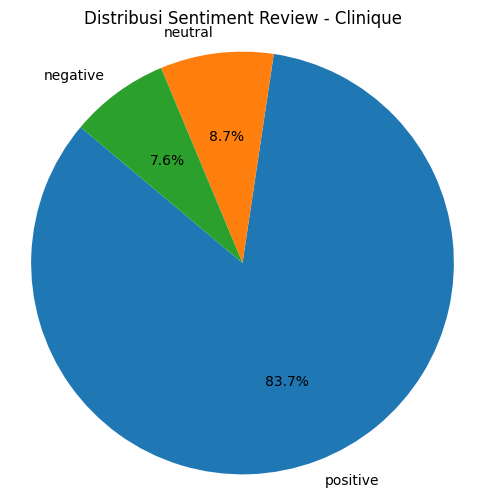

In [39]:
#Visualisasi Distribusi Sentiment Pie Chart
sentiment_counts = brand_df['sentiment_label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Sentiment Review - Clinique')
plt.axis('equal')
plt.show()

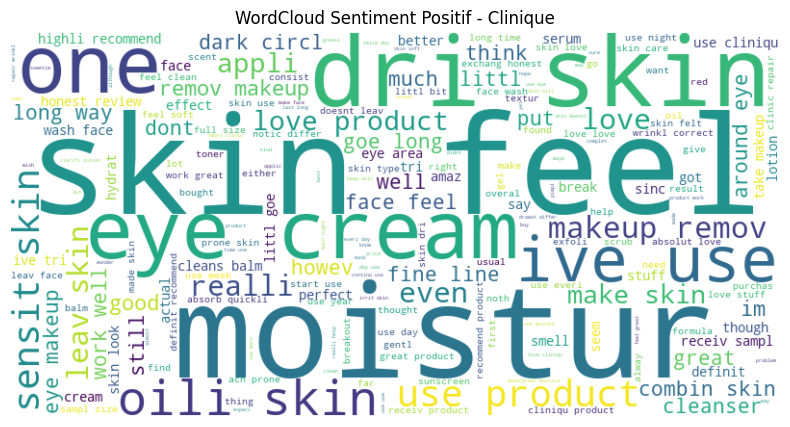

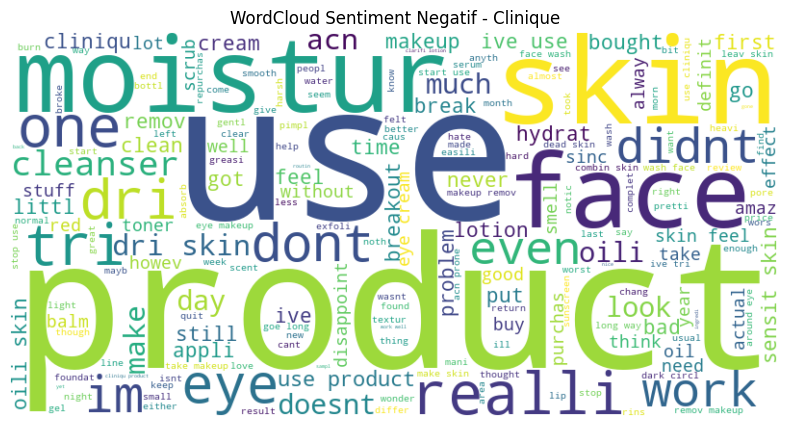

In [43]:
# Wordcloud per sentimen

positive_text = ' '.join(brand_df[brand_df['sentiment_label'] == 'positive']['text_akhir'].dropna())
negative_text = ' '.join(brand_df[brand_df['sentiment_label'] == 'negative']['text_akhir'].dropna())

# worldCloud positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentiment Positif - Clinique')
plt.show()

# worldCloud Negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentiment Negatif - Clinique')
plt.show()
